# Install Libraries

In [1]:
!pip install datasets transformers rouge-score nltk

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=4d6fa7acb25000a32cd223ffe2da33772b0ac3f7fdab289768fac57d08b2193c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that a

# Import Dataset (Local)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/dataset_ringkasan_berita_clean.csv')
df.head()

,id,text,summary,category,source,url
0,1501893029-lula-kamal-dokter-ryan-thamrin-saki...,Jakarta Dokter Ryan Thamrin yang terkenal lewa...,Dokter Lula Kamal yang merupakan selebriti sek...,tajuk utama,cnn indonesia,https://www.cnnindonesia.com/hiburan/201708041...
1,1509072914-dua-smartphone-zenfone-baru-tawarka...,Selfie ialah salah satu tema terpanas di kalan...,Asus memperkenalkan ZenFone generasi keempat d...,teknologi,dailysocial.id,https://dailysocial.id/post/dua-smartphone-zen...
2,1510613677-songsong-visit-2020-bengkulu-perkua...,Jakarta Dinas Pariwisata Provinsi Bengkulu kem...,Dinas Pariwisata Provinsi Bengkulu kembali men...,hiburan,cnn indonesia,https://www.cnnindonesia.com/gaya-hidup/201711...
3,1502706803-icw-ada-kejanggalan-atas-tewasnya-s...,Indonesia Corruption Watch ICW meminta Komisi ...,Indonesia Corruption Watch ICW meminta Komisi ...,tajuk utama,merdeka,https://www.merdeka.com/peristiwa/icw-merasa-a...
4,1503039338-pembagian-sepeda-usai-upacara-penur...,Presiden Joko Widodo Jokowi memimpin upacara p...,Jokowi memimpin upacara penurunan bendera Usai...,tajuk utama,merdeka,https://www.merdeka.com/peristiwa/usai-upacara...


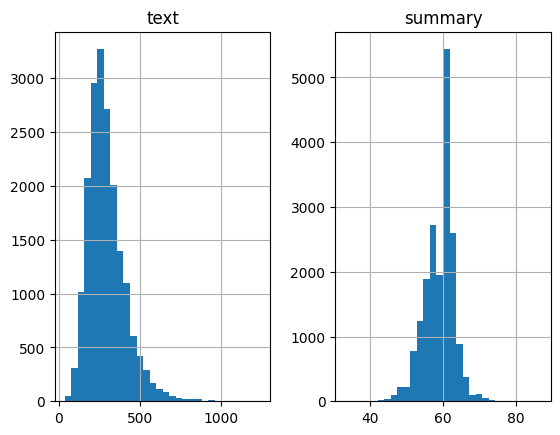

In [3]:
# %% Analyze length distribution of text and summary
text_word_count = [len(text.split()) for text in df['text']]
summary_word_count = [len(summary.split()) for summary in df['summary']]

# Plot histograms
length_df = pd.DataFrame({'text': text_word_count, 'summary': summary_word_count})
length_df.hist(bins=30)
plt.show()

In [4]:
# Set maximum lengths based on histogram
max_text_len = 500
max_summary_len = 70

In [5]:
import numpy as np

# Filter short texts and summaries based on maximum length
cleaned_text =np.array(df['text'])
cleaned_summary=np.array(df['summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

In [6]:
df_short=pd.DataFrame({'text':short_text,'summary':short_summary})
df_short.head()

,text,summary
0,Jakarta Dokter Ryan Thamrin yang terkenal lewa...,Dokter Lula Kamal yang merupakan selebriti sek...
1,Indonesia Corruption Watch ICW meminta Komisi ...,Indonesia Corruption Watch ICW meminta Komisi ...
2,Presiden Joko Widodo Jokowi memimpin upacara p...,Jokowi memimpin upacara penurunan bendera Usai...
3,Timnas Indonesia hanya mampu meraih kemenangan...,Timnas Indonesia hanya mampu meraih kemenangan...
4,Tahun lalu HP meluncurkan sebuah printer porta...,Tahun lalu HP meluncurkan sebuah printer porta...


In [7]:
print(df_short['text'].str.split().str.len().max())
print(df_short['summary'].str.split().str.len().max())

500
70


In [8]:
news_full = df_short[:2200]

In [9]:
news_full.head()

,text,summary
0,Jakarta Dokter Ryan Thamrin yang terkenal lewa...,Dokter Lula Kamal yang merupakan selebriti sek...
1,Indonesia Corruption Watch ICW meminta Komisi ...,Indonesia Corruption Watch ICW meminta Komisi ...
2,Presiden Joko Widodo Jokowi memimpin upacara p...,Jokowi memimpin upacara penurunan bendera Usai...
3,Timnas Indonesia hanya mampu meraih kemenangan...,Timnas Indonesia hanya mampu meraih kemenangan...
4,Tahun lalu HP meluncurkan sebuah printer porta...,Tahun lalu HP meluncurkan sebuah printer porta...


In [10]:
df_train = news_full[:2000]
df_predict = news_full[2000:2200]
df_predict.reset_index(drop=True, inplace=True)

# Initiate ROUGE Score

In [11]:
from rouge_score import rouge_scorer

# Inisialisasi scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)


# # Use Case
# scores = scorer.score('REFERENCE', 'GENERATED')
# print(scores['rouge1'].fmeasure)
# print(scores['rouge2'].fmeasure)
# print(scores['rougeL'].fmeasure)

# 1) Mencoba Model LLM LazarusNLP/IndoNanoT5-base dan Fine-Tune sesuai Dataset

## Load Model IndoNanoT5-base

In [12]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_checkpoint = "LazarusNLP/IndoNanoT5-base"

In [13]:
tokenizer_base = AutoTokenizer.from_pretrained(model_checkpoint)
model_base = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.03M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [14]:
model_base.eval()  # Mengatur model ke mode evaluasi

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

## Mencoba Generate Ringkasan dari Base Model IndoNanoT5

In [15]:
teks_berita = df_predict['text'][0]
referensi_ringkasan = df_predict['summary'][0]

print(teks_berita)
print(referensi_ringkasan)

Jakarta Baru memiliki sepasang anak kembar ternyata bukan satu satunya kabar menyenangkan dari Jay Z Suami Beyonce itu mengumumkan akan merilis album baru yang bertajuk 4 44 pada akhir Juni Melansir AFP kabar itu diumumkan Senin 19 6 waktu Amerika Serikat melalui layanan musik daring yang dimiliki Jay Z Tidal Album itu pun tersedia secara eksklusif untuk pelanggan Tidal dan Sprint perusahaan telekomunikasi yang membeli 30 persen saham Tidal Sebuah trailer selama 30 detik menampilkan lirik dari sang rapper yang mengindikasikan sebuah album baru di tengah berita Beyonce telah melahirkan Senin 19 6 Trailer tersebut kemudian dikonfirmasi oleh Tidal dan Sprint pada tengah malam Jay Z adalah ikon global dan kami memberikan pelanggan kami kesempatan luar biasa untuk berada di antara orang pertama yang dapat menikmati album barunya Jay Z 4 44 kata CEO Sprint Marcelo Claure dalam pernyataannya Sebelumnya rumor Jay Z akan merilis album baru sudah tersiar setelah berbagai publikasi bertuliskan 4 

In [32]:
# Teks input
input_text = "Rangkum teks berita ini: " + teks_berita

# Tokenisasi
input_ids = tokenizer_base.encode(input_text, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_base.generate(input_ids, max_length=70)
output_text = tokenizer_base.decode(output_ids[0], skip_special_tokens=True)

print("Berita: ", teks_berita)
print("Referensi: ", referensi_ringkasan)
print("Ringkasan Hasil Pre-Trained:", output_text)

Berita:  Jakarta Baru memiliki sepasang anak kembar ternyata bukan satu satunya kabar menyenangkan dari Jay Z Suami Beyonce itu mengumumkan akan merilis album baru yang bertajuk 4 44 pada akhir Juni Melansir AFP kabar itu diumumkan Senin 19 6 waktu Amerika Serikat melalui layanan musik daring yang dimiliki Jay Z Tidal Album itu pun tersedia secara eksklusif untuk pelanggan Tidal dan Sprint perusahaan telekomunikasi yang membeli 30 persen saham Tidal Sebuah trailer selama 30 detik menampilkan lirik dari sang rapper yang mengindikasikan sebuah album baru di tengah berita Beyonce telah melahirkan Senin 19 6 Trailer tersebut kemudian dikonfirmasi oleh Tidal dan Sprint pada tengah malam Jay Z adalah ikon global dan kami memberikan pelanggan kami kesempatan luar biasa untuk berada di antara orang pertama yang dapat menikmati album barunya Jay Z 4 44 kata CEO Sprint Marcelo Claure dalam pernyataannya Sebelumnya rumor Jay Z akan merilis album baru sudah tersiar setelah berbagai publikasi bertu

In [33]:
scores = scorer.score(referensi_ringkasan, output_text)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.15555555555555556
0.022727272727272728
0.1111111111111111


## Fine Tuning Model IndoNanoT5-base

In [18]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments, DataCollatorWithPadding

tokenizer_ft = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    # Tokenisasi teks input
    model_inputs = tokenizer_ft(
        examples['text'],
        max_length=512,
        truncation=True,
        padding='max_length'  # Add padding to max_length
    )
    # Tokenisasi target
    with tokenizer_ft.as_target_tokenizer():
        labels = tokenizer_ft(
            examples['summary'],
            max_length=128,
            truncation=True,
            padding='max_length'  # Add padding to max_length
        )
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_dataset = df_train.apply(tokenize_function, axis=1)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [19]:
tokenized_dataset.head()

,0
0,"[input_ids, attention_mask, labels]"
1,"[input_ids, attention_mask, labels]"
2,"[input_ids, attention_mask, labels]"
3,"[input_ids, attention_mask, labels]"
4,"[input_ids, attention_mask, labels]"


In [20]:
train_dataset = tokenized_dataset[:1800]
eval_dataset = tokenized_dataset[1800:2000]  # atau 'validation' jika ada
eval_dataset.reset_index(drop=True, inplace=True)

In [21]:
train_dataset.head()

,0
0,"[input_ids, attention_mask, labels]"
1,"[input_ids, attention_mask, labels]"
2,"[input_ids, attention_mask, labels]"
3,"[input_ids, attention_mask, labels]"
4,"[input_ids, attention_mask, labels]"


In [22]:
eval_dataset.head()

,0
0,"[input_ids, attention_mask, labels]"
1,"[input_ids, attention_mask, labels]"
2,"[input_ids, attention_mask, labels]"
3,"[input_ids, attention_mask, labels]"
4,"[input_ids, attention_mask, labels]"


### Mengatur Parameter Model untuk Fine-Tuning

In [58]:
# Parameter
learning_rate = 5e-5  # Laju pembelajaran
train_batch_size = 6    # Ukuran batch untuk pelatihan
epochs = 10              # Jumlah epoch
weight_decay = 0.001      # Pengurangan bobot

# Direktori untuk menyimpan hasil
output_directory = f'./results_indonanot5_{learning_rate}_{train_batch_size}_{epochs}'

In [24]:
from transformers import T5ForConditionalGeneration, Trainer, TrainingArguments

model_ft = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

# Use DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer_ft)

training_args = TrainingArguments(
    output_dir = output_directory,          # direktori untuk menyimpan model
    evaluation_strategy="epoch",     # evaluasi setiap epoch
    learning_rate=learning_rate,
    per_device_train_batch_size=train_batch_size,   # ukuran batch untuk pelatihan
    num_train_epochs=epochs,              # jumlah epoch
    weight_decay=weight_decay,               # pengurangan bobot
)


trainer = Trainer(
    model=model_ft,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,  # Use the data collator
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### Melakukan Re-Train untuk Fine-tuning

In [25]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,No log,0.417902
2,0.802300,0.379284
3,0.802300,0.396192
4,0.293600,0.401993
5,0.187200,0.424517
6,0.187200,0.457529
7,0.117600,0.474406
8,0.117600,0.498432
9,0.079900,0.503454
10,0.062200,0.513108


TrainOutput(global_step=3000, training_loss=0.2571316140492757, metrics={'train_runtime': 3704.8172, 'train_samples_per_second': 4.859, 'train_steps_per_second': 0.81, 'total_flos': 1.2325632344064e+16, 'train_loss': 0.2571316140492757, 'epoch': 10.0})

<ipython-input-57-238ed54d08ff>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Validation Loss'].fillna(method='ffill', inplace=True)  # Forward fill for missing values
<ipython-input-57-238ed54d08ff>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Validation Loss'].fillna(method='ffill', inplace=True)  # Forward fill for missing values


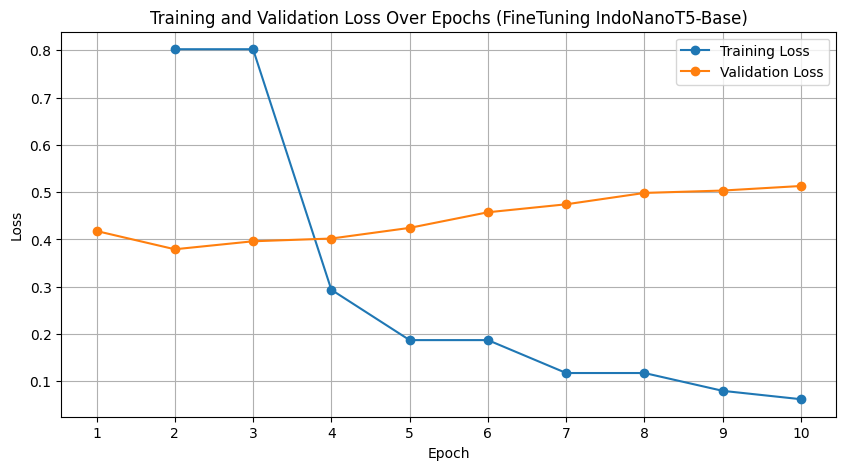

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
data = {
    'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Training Loss': [None, 0.802300, 0.802300, 0.293600, 0.187200, 0.187200, 0.117600, 0.117600, 0.079900, 0.062200],
    'Validation Loss': [0.417902, 0.379284, 0.396192, 0.401993, 0.424517, 0.457529, 0.474406, 0.498432, 0.503454, 0.513108]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fill missing values for plotting
df['Validation Loss'].fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', marker='o', linestyle='-')
plt.title('Training and Validation Loss Over Epochs (FineTuning IndoNanoT5-Base)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(df['Epoch'])  # Set x-ticks to be the epoch numbers
plt.legend()
plt.grid()
plt.show()


### Menyimpan Model Hasil FineTune IndoNanoT5-base dengan Dataset Sendiri

In [59]:
model_ft_output_directory = f'./fine_tuned_model_indonanot5_{learning_rate}_{train_batch_size}_{epochs}'

In [60]:
model_ft.save_pretrained(model_ft_output_directory)
tokenizer_ft.save_pretrained(model_ft_output_directory)

('./fine_tuned_model_indonanot5_5e-05_6_10/tokenizer_config.json',
 './fine_tuned_model_indonanot5_5e-05_6_10/special_tokens_map.json',
 './fine_tuned_model_indonanot5_5e-05_6_10/tokenizer.json')

### Mencoba Generate Summary dengan Model IndoNanoT5-base Hasil FineTune

In [35]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer_result = AutoTokenizer.from_pretrained(model_ft_output_directory)
model_result = AutoModelForSeq2SeqLM.from_pretrained(model_ft_output_directory)

# Teks input
input_text = "Rangkum teks berita ini: " + teks_berita

# Tokenisasi
input_ids = tokenizer_result.encode(input_text, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_result.generate(input_ids, max_length=70)
output_text = tokenizer_result.decode(output_ids[0], skip_special_tokens=True)

print("Berita: ", teks_berita)
print("Referensi: ", referensi_ringkasan)
print("Ringkasan Hasil Fine Tune:", output_text)

Berita:  Jakarta Baru memiliki sepasang anak kembar ternyata bukan satu satunya kabar menyenangkan dari Jay Z Suami Beyonce itu mengumumkan akan merilis album baru yang bertajuk 4 44 pada akhir Juni Melansir AFP kabar itu diumumkan Senin 19 6 waktu Amerika Serikat melalui layanan musik daring yang dimiliki Jay Z Tidal Album itu pun tersedia secara eksklusif untuk pelanggan Tidal dan Sprint perusahaan telekomunikasi yang membeli 30 persen saham Tidal Sebuah trailer selama 30 detik menampilkan lirik dari sang rapper yang mengindikasikan sebuah album baru di tengah berita Beyonce telah melahirkan Senin 19 6 Trailer tersebut kemudian dikonfirmasi oleh Tidal dan Sprint pada tengah malam Jay Z adalah ikon global dan kami memberikan pelanggan kami kesempatan luar biasa untuk berada di antara orang pertama yang dapat menikmati album barunya Jay Z 4 44 kata CEO Sprint Marcelo Claure dalam pernyataannya Sebelumnya rumor Jay Z akan merilis album baru sudah tersiar setelah berbagai publikasi bertu

In [36]:
scores = scorer.score(referensi_ringkasan, output_text)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.8
0.7610619469026548
0.8


# 2) Mencoba Model LLM lain (google/mt5-small) Untuk Generate Ringkasan dengan 1-shot dan Few-shots

## Load Model mt5-small

In [37]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer

# Muat model dan tokenizer
model_name = 'google/mt5-small'
tokenizer_mt5 = MT5Tokenizer.from_pretrained(model_name)
model_mt5 = MT5ForConditionalGeneration.from_pretrained(model_name)

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

## Mencoba Generate Ringkasan dengan One-Shot Learning

In [38]:
input_text_one_shot = df_train['text'][0]
example_summary_one_shot = df_train['summary'][0]

task_text = df_predict['text'][0]
task_summary = df_predict['summary'][0]

In [39]:
print('Contoh Teks: ', input_text_one_shot)
print('Contoh Ringkasan: ', example_summary_one_shot)

Contoh Teks:  Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia com Jumat 4 8 Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh Dia juga tak tahu penyakit apa yang diderita Ryan Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bi

In [49]:
print('Teks yang ingin diringkas: ', task_text)

Teks yang ingin diringkas:  Jakarta Baru memiliki sepasang anak kembar ternyata bukan satu satunya kabar menyenangkan dari Jay Z Suami Beyonce itu mengumumkan akan merilis album baru yang bertajuk 4 44 pada akhir Juni Melansir AFP kabar itu diumumkan Senin 19 6 waktu Amerika Serikat melalui layanan musik daring yang dimiliki Jay Z Tidal Album itu pun tersedia secara eksklusif untuk pelanggan Tidal dan Sprint perusahaan telekomunikasi yang membeli 30 persen saham Tidal Sebuah trailer selama 30 detik menampilkan lirik dari sang rapper yang mengindikasikan sebuah album baru di tengah berita Beyonce telah melahirkan Senin 19 6 Trailer tersebut kemudian dikonfirmasi oleh Tidal dan Sprint pada tengah malam Jay Z adalah ikon global dan kami memberikan pelanggan kami kesempatan luar biasa untuk berada di antara orang pertama yang dapat menikmati album barunya Jay Z 4 44 kata CEO Sprint Marcelo Claure dalam pernyataannya Sebelumnya rumor Jay Z akan merilis album baru sudah tersiar setelah berba

In [41]:
# Gabungkan input dan contoh
prompt = f"Berita: {input_text_one_shot} \nRingkasan: {example_summary_one_shot}\n\nBerita: {task_text}\nRingkasan: "

In [42]:
print(prompt)

Berita: Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia com Jumat 4 8 Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh Dia juga tak tahu penyakit apa yang diderita Ryan Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bisa dij

In [43]:
# Tokenisasi
input_ids = tokenizer_mt5.encode(prompt, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_mt5.generate(input_ids, max_length=70)
output_summary_one_shot = tokenizer_mt5.decode(output_ids[0], skip_special_tokens=True)

print("Ringkasan One-Shot:", output_summary_one_shot)

Ringkasan One-Shot: <extra_id_0> lebih lanjut


In [50]:
scores = scorer.score(task_summary, output_summary_one_shot)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.0
0.0
0.0


## Mencoba Generate Ringkasan dengan Few-Shots Learning

In [45]:
input_text_few_shots = [
   df_train['text'][0],
   df_train['text'][1],
   df_train['text'][2],
   df_train['text'][3],
   df_train['text'][4]
  ]

example_summary_few_shots = [
  df_train['summary'][0],
  df_train['summary'][1],
  df_train['summary'][2],
  df_train['summary'][3],
  df_train['summary'][4]
]

In [46]:
few_shots_example = ""

# Loop untuk menggabungkan output
for i in range(5):
    few_shots_example += f'Berita: {input_text_few_shots[i]}\n'
    few_shots_example += f'Ringkasan: {example_summary_few_shots[i]}\n\n'

few_shots_example += f'Berita: {task_text}\nRingkasan: '

# Menampilkan semua output dalam satu variabel
print(few_shots_example)

Berita: Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia com Jumat 4 8 Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh Dia juga tak tahu penyakit apa yang diderita Ryan Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bisa dij

In [47]:
# Gabungkan input dan contoh
prompt = few_shots_example

# Tokenisasi
input_ids = tokenizer_mt5.encode(prompt, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_mt5.generate(input_ids, max_length=50)
output_summary_few_shots = tokenizer_mt5.decode(output_ids[0], skip_special_tokens=True)

print("Ringkasan Few-Shots:", output_summary_few_shots)

Ringkasan Few-Shots: <extra_id_0> menjadi lebih menarik dari informasi ini


In [48]:
scores = scorer.score(task_summary, output_summary_few_shots)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.02941176470588235
0.0
0.02941176470588235


# 3) Fine-Tune Model google/mt5-small untuk Generate Ringkasan dengan Dataset Sendiri

## Fine Tuning Model google/mt5-small

In [61]:
# Muat model dan tokenizer
model_checkpoint = 'google/mt5-small'

In [62]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments, DataCollatorWithPadding

tokenizer_ft_mt5 = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    # Tokenisasi teks input
    model_inputs = tokenizer_ft_mt5(
        examples['text'],
        max_length=512,
        truncation=True,
        padding='max_length'  # Add padding to max_length
    )
    # Tokenisasi target
    with tokenizer_ft_mt5.as_target_tokenizer():
        labels = tokenizer_ft_mt5(
            examples['summary'],
            max_length=128,
            truncation=True,
            padding='max_length'  # Add padding to max_length
        )
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_dataset = df_train.apply(tokenize_function, axis=1)

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [63]:
tokenized_dataset.head()

,0
0,"[input_ids, attention_mask, labels]"
1,"[input_ids, attention_mask, labels]"
2,"[input_ids, attention_mask, labels]"
3,"[input_ids, attention_mask, labels]"
4,"[input_ids, attention_mask, labels]"


In [64]:
train_dataset = tokenized_dataset[:1800]
eval_dataset = tokenized_dataset[1800:2000]  # atau 'validation' jika ada
eval_dataset.reset_index(drop=True, inplace=True)

In [65]:
train_dataset.head()

,0
0,"[input_ids, attention_mask, labels]"
1,"[input_ids, attention_mask, labels]"
2,"[input_ids, attention_mask, labels]"
3,"[input_ids, attention_mask, labels]"
4,"[input_ids, attention_mask, labels]"


In [66]:
eval_dataset.head()

,0
0,"[input_ids, attention_mask, labels]"
1,"[input_ids, attention_mask, labels]"
2,"[input_ids, attention_mask, labels]"
3,"[input_ids, attention_mask, labels]"
4,"[input_ids, attention_mask, labels]"


### Mengatur Parameter Model untuk Fine-Tuning

In [67]:
# Parameter
learning_rate = 5e-5  # Laju pembelajaran
train_batch_size = 6    # Ukuran batch untuk pelatihan
epochs = 10              # Jumlah epoch
weight_decay = 0.001      # Pengurangan bobot

# Direktori untuk menyimpan hasil
output_directory = f'./results_mt5_{learning_rate}_{train_batch_size}_{epochs}'

In [68]:
from transformers import T5ForConditionalGeneration, Trainer, TrainingArguments

model_ft_mt5 = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

# Use DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer_ft_mt5)

training_args = TrainingArguments(
    output_dir = output_directory,          # direktori untuk menyimpan model
    evaluation_strategy="epoch",     # evaluasi setiap epoch
    learning_rate=learning_rate,
    per_device_train_batch_size=train_batch_size,   # ukuran batch untuk pelatihan
    num_train_epochs=epochs,              # jumlah epoch
    weight_decay=weight_decay,               # pengurangan bobot
)


trainer = Trainer(
    model=model_ft_mt5,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,  # Use the data collator
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### Melakukan Re-Train untuk Fine-tuning dengan Dataset Sendiri

In [69]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,No log,2.993078
2,10.449100,0.886132
3,10.449100,0.670692
4,1.684500,0.666020
5,1.138600,0.643905
6,1.138600,0.628667
7,0.998100,0.626453
8,0.998100,0.620023
9,0.904800,0.613712
10,0.889800,0.613640


TrainOutput(global_step=3000, training_loss=2.677504180908203, metrics={'train_runtime': 2009.5987, 'train_samples_per_second': 8.957, 'train_steps_per_second': 1.493, 'total_flos': 9517494435840000.0, 'train_loss': 2.677504180908203, 'epoch': 10.0})

<ipython-input-87-f8cb5d8c4891>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Validation Loss'].fillna(method='ffill', inplace=True)  # Forward fill for missing values
<ipython-input-87-f8cb5d8c4891>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Validation Loss'].fillna(method='ffill', inplace=True)  # Forward fill for missing values


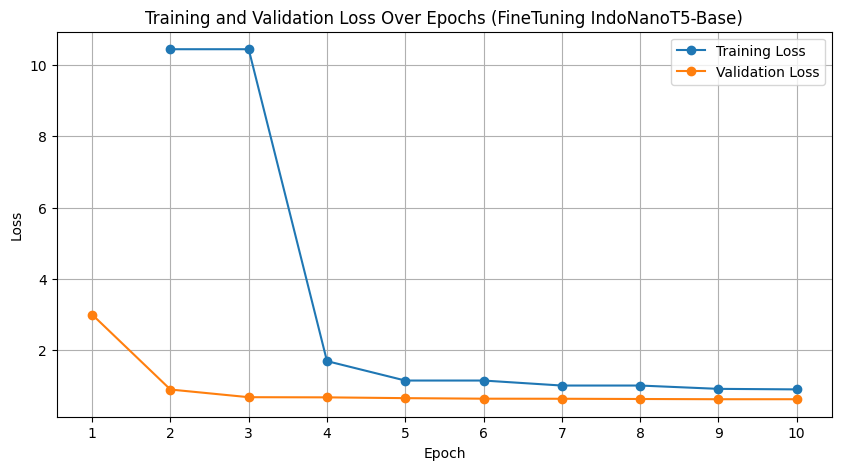

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
data = {
    'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Training Loss': [None, 10.449100, 10.449100, 1.684500, 1.138600, 1.138600, 0.998100, 0.998100, 0.904800, 0.889800],
    'Validation Loss': [2.993078, 0.886132, 0.670692, 0.666020, 0.643905, 0.628667, 0.626453, 0.620023, 0.613712, 0.613640]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fill missing values for plotting
df['Validation Loss'].fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', marker='o', linestyle='-')
plt.title('Training and Validation Loss Over Epochs (FineTuning IndoNanoT5-Base)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(df['Epoch'])  # Set x-ticks to be the epoch numbers
plt.legend()
plt.grid()
plt.show()


### Menyimpan Model Hasil FineTune google/mt5-small dengan Dataset Sendiri

In [71]:
model_ft_mt5_output_directory = f'./fine_tuned_model_mt5_{learning_rate}_{train_batch_size}_{epochs}'

In [90]:
model_ft_mt5.save_pretrained(model_ft_mt5_output_directory)
tokenizer_ft_mt5.save_pretrained(model_ft_mt5_output_directory)

('./fine_tuned_model_mt5_5e-05_6_10/tokenizer_config.json',
 './fine_tuned_model_mt5_5e-05_6_10/special_tokens_map.json',
 './fine_tuned_model_mt5_5e-05_6_10/spiece.model',
 './fine_tuned_model_mt5_5e-05_6_10/added_tokens.json',
 './fine_tuned_model_mt5_5e-05_6_10/tokenizer.json')

### Mencoba Generate Summary dengan Model google/mt5-small Hasil FineTune

In [91]:
teks_berita = df_predict['text'][0]
referensi_ringkasan = df_predict['summary'][0]

0 Shot

In [92]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer_result_mt5 = AutoTokenizer.from_pretrained(model_ft_mt5_output_directory)
model_result_mt5 = AutoModelForSeq2SeqLM.from_pretrained(model_ft_mt5_output_directory)

# Teks input
input_text = teks_berita

# Tokenisasi
input_ids = tokenizer_result_mt5.encode(input_text, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_result_mt5.generate(input_ids, max_length=70)
output_text = tokenizer_result_mt5.decode(output_ids[0], skip_special_tokens=True)

print("Berita: ", teks_berita)
print("Referensi: ", referensi_ringkasan)
print("Ringkasan Hasil Fine Tune:", output_text)

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Berita:  Jakarta Baru memiliki sepasang anak kembar ternyata bukan satu satunya kabar menyenangkan dari Jay Z Suami Beyonce itu mengumumkan akan merilis album baru yang bertajuk 4 44 pada akhir Juni Melansir AFP kabar itu diumumkan Senin 19 6 waktu Amerika Serikat melalui layanan musik daring yang dimiliki Jay Z Tidal Album itu pun tersedia secara eksklusif untuk pelanggan Tidal dan Sprint perusahaan telekomunikasi yang membeli 30 persen saham Tidal Sebuah trailer selama 30 detik menampilkan lirik dari sang rapper yang mengindikasikan sebuah album baru di tengah berita Beyonce telah melahirkan Senin 19 6 Trailer tersebut kemudian dikonfirmasi oleh Tidal dan Sprint pada tengah malam Jay Z adalah ikon global dan kami memberikan pelanggan kami kesempatan luar biasa untuk berada di antara orang pertama yang dapat menikmati album barunya Jay Z 4 44 kata CEO Sprint Marcelo Claure dalam pernyataannya Sebelumnya rumor Jay Z akan merilis album baru sudah tersiar setelah berbagai publikasi bertu

In [93]:
scores = scorer.score(referensi_ringkasan, output_text)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.6415094339622641
0.5961538461538461
0.6415094339622641


1-Shot

In [94]:
input_text_one_shot = df_train['text'][0]
example_summary_one_shot = df_train['summary'][0]

task_text = df_predict['text'][0]
task_summary = df_predict['summary'][0]

In [95]:
print('Contoh Teks: ', input_text_one_shot)
print('Contoh Ringkasan: ', example_summary_one_shot)

Contoh Teks:  Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia com Jumat 4 8 Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh Dia juga tak tahu penyakit apa yang diderita Ryan Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bi

In [96]:
print('Teks yang ingin diringkas: ', task_text)

Teks yang ingin diringkas:  Jakarta Baru memiliki sepasang anak kembar ternyata bukan satu satunya kabar menyenangkan dari Jay Z Suami Beyonce itu mengumumkan akan merilis album baru yang bertajuk 4 44 pada akhir Juni Melansir AFP kabar itu diumumkan Senin 19 6 waktu Amerika Serikat melalui layanan musik daring yang dimiliki Jay Z Tidal Album itu pun tersedia secara eksklusif untuk pelanggan Tidal dan Sprint perusahaan telekomunikasi yang membeli 30 persen saham Tidal Sebuah trailer selama 30 detik menampilkan lirik dari sang rapper yang mengindikasikan sebuah album baru di tengah berita Beyonce telah melahirkan Senin 19 6 Trailer tersebut kemudian dikonfirmasi oleh Tidal dan Sprint pada tengah malam Jay Z adalah ikon global dan kami memberikan pelanggan kami kesempatan luar biasa untuk berada di antara orang pertama yang dapat menikmati album barunya Jay Z 4 44 kata CEO Sprint Marcelo Claure dalam pernyataannya Sebelumnya rumor Jay Z akan merilis album baru sudah tersiar setelah berba

In [97]:
# Gabungkan input dan contoh
prompt = f"Berita: {input_text_one_shot} \nRingkasan: {example_summary_one_shot}\n\nBerita: {task_text}\nRingkasan: "

In [98]:
print(prompt)

Berita: Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia com Jumat 4 8 Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh Dia juga tak tahu penyakit apa yang diderita Ryan Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bisa dij

In [99]:
# Tokenisasi
input_ids = tokenizer_result_mt5.encode(prompt, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_result_mt5.generate(input_ids, max_length=70)
output_summary_one_shot = tokenizer_result_mt5.decode(output_ids[0], skip_special_tokens=True)

print("Ringkasan One-Shot:", output_summary_one_shot)

Ringkasan One-Shot: <extra_id_0> Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal


In [100]:
scores = scorer.score(task_summary, output_summary_one_shot)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.09259259259259259
0.0
0.07407407407407407


Few-Shots

In [101]:
input_text_few_shots = [
   df_train['text'][0],
   df_train['text'][1],
   df_train['text'][2],
   df_train['text'][3],
   df_train['text'][4]
  ]

example_summary_few_shots = [
  df_train['summary'][0],
  df_train['summary'][1],
  df_train['summary'][2],
  df_train['summary'][3],
  df_train['summary'][4]
]

In [102]:
few_shots_example = ""

# Loop untuk menggabungkan output
for i in range(5):
    few_shots_example += f'Berita: {input_text_few_shots[i]}\n'
    few_shots_example += f'Ringkasan: {example_summary_few_shots[i]}\n\n'

few_shots_example += f'Berita: {task_text}\nRingkasan: '

# Menampilkan semua output dalam satu variabel
print(few_shots_example)

Berita: Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu Lula menuturkan sakit itu membuat Ryan mesti vakum dari semua kegiatannya termasuk menjadi pembawa acara Dokter Oz Indonesia Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru Riau untuk menjalani istirahat Setahu saya dia orangnya sehat tapi tahun lalu saya dengar dia sakit Karena sakitnya ia langsung pulang ke Pekanbaru jadi kami yang mau jenguk juga susah Barangkali mau istirahat ya betul juga kalau di Jakarta susah isirahatnya kata Lula kepada CNNIndonesia com Jumat 4 8 Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh Dia juga tak tahu penyakit apa yang diderita Ryan Itu saya enggak tahu belum sempat jenguk dan enggak selamanya bisa dij

In [103]:
# Gabungkan input dan contoh
prompt = few_shots_example

# Tokenisasi
input_ids = tokenizer_result_mt5.encode(prompt, return_tensors='pt')

# Menghasilkan ringkasan
output_ids = model_result_mt5.generate(input_ids, max_length=50)
output_summary_few_shots = tokenizer_result_mt5.decode(output_ids[0], skip_special_tokens=True)

print("Ringkasan Few-Shots:", output_summary_few_shots)

Ringkasan Few-Shots: <extra_id_0> Berita: Jakarta Dokter Ryan Thamrin yang terkenal lewat acara Dokter Oz Indonesia meninggal dunia pada Jumat 4 8 dini hari Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menye


In [104]:
scores = scorer.score(task_summary, output_summary_few_shots)
print(scores['rouge1'].fmeasure)
print(scores['rouge2'].fmeasure)
print(scores['rougeL'].fmeasure)

0.08602150537634408
0.0
0.06451612903225808
